In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

In [12]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [13]:
y=boston_data.target

In [14]:
df=pd.read_csv("C:/Users/neeru.singla01/Desktop/Boston Housing/housing.data",delim_whitespace=True,header=-1)#header=None
cols=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df.columns=cols

## Brief Introduction to Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
X=df[['LSTAT']].values
y=df[['MEDV']].values

In [24]:
tree=DecisionTreeRegressor(max_depth=5)

In [25]:
tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
sort_idx=X.flatten().argsort()

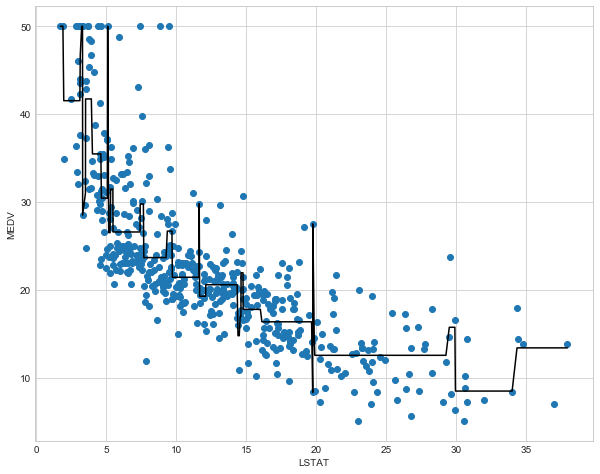

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

Without sorting

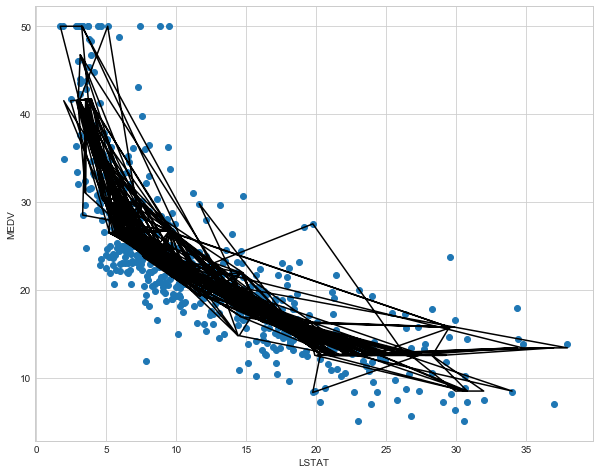

In [28]:
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(X,y)
# sort_idx=X.flatten().argsort()
plt.figure(figsize=(10,8))
# plt.scatter(X[sort_idx],y[sort_idx])
# plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.scatter(X,y)
plt.plot(X,tree.predict(X),color='k')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

By using max_depth=5, we r getting overfit model which is also modelling the noise

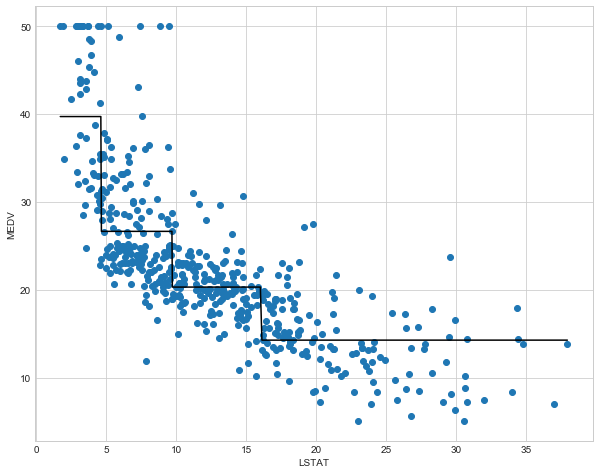

In [31]:
tree=DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
sort_idx=X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

## Brief Introduction to Random Forest

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
X=df.values
y=df[['MEDV']].values

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
forest=RandomForestRegressor(n_estimators=500, criterion='mse',random_state=42,n_jobs=-1)

In [40]:
forest.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
y_train_pred=forest.predict(X_train)

In [43]:
y_test_pred=forest.predict(X_test)

In [45]:
print("MSE train:{0:.4f}, test:{1:.4f}".format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:0.0091, test:0.0228


In [47]:
print(r2_score(y_test,y_test_pred))

0.9996943538004949


In [48]:
print(r2_score(y_train,y_train_pred))

0.9998968762327318


## Brief Introduction to AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostRegressor

In [51]:
ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500,random_state=42)

In [52]:
ada.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [53]:
y_train_pred=ada.predict(X_train)

In [55]:
y_test_pred=ada.predict(X_test)

In [57]:
print("MSE train:{0:.4f},test:{1:.4f}".format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train:0.0367,test:0.0386


In [66]:
print("R2_score=",r2_score(y_train,y_train_pred))
print("R2_score=",r2_score(y_test,y_test_pred))

R2_score= 0.9995826059684549
R2_score= 0.9994823225393509


## Revisiting Feature Importance
    13 features
    Are they all equally important?
    Which features are more important?
    Can scikit-learn help us with this?

## According to AdaBoost

In [67]:
ada.feature_importances_

array([2.80225443e-05, 5.53457049e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.25731871e-06, 1.68936592e-05, 2.08258460e-06,
       2.79971771e-05, 5.98765626e-06, 0.00000000e+00, 0.00000000e+00,
       1.73164909e-05, 9.99886908e-01])

In [68]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [70]:
result=pd.DataFrame(ada.feature_importances_,df.columns)
result.columns=['Feature']

In [73]:
result.sort_values(by='Feature', ascending=False)

,Feature
MEDV,0.999887
CRIM,0.000028
RAD,0.000028
LSTAT,0.000017
AGE,0.000017
RM,0.000009
TAX,0.000006
ZN,0.000006
DIS,0.000002
INDUS,0.000000


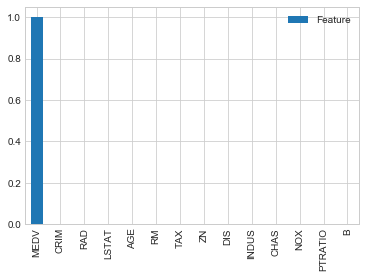

In [74]:
result.sort_values(by='Feature',ascending=False).plot(kind='bar')